In [ ]:
######################### GRAFICOS ALEATORIOS,IDEIAS#####################################################

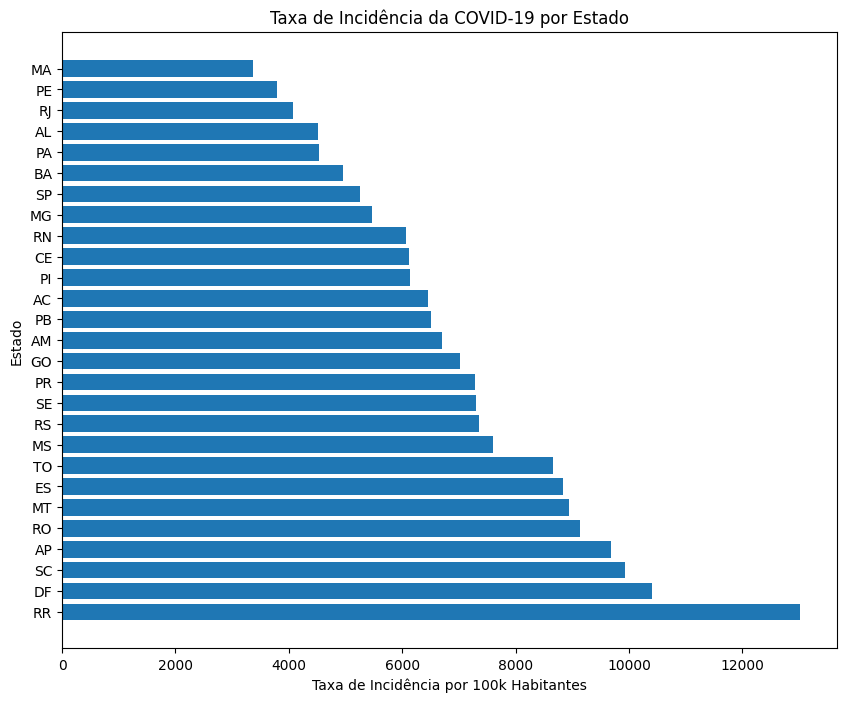

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('caso_full.csv')

# Agrupando por estado e somando os casos confirmados e a população estimada
state_data = df.groupby('state').agg({
    'last_available_confirmed': 'sum',
    'estimated_population': 'sum'
}).reset_index()

# Calculando a taxa de incidência por 100k habitantes
state_data['incidence_rate'] = state_data['last_available_confirmed'] / state_data['estimated_population'] * 100000

# Ordenando os dados pela taxa de incidência
state_data = state_data.sort_values('incidence_rate', ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(state_data['state'], state_data['incidence_rate'])
plt.xlabel('Taxa de Incidência por 100k Habitantes')
plt.ylabel('Estado')
plt.title('Taxa de Incidência da COVID-19 por Estado')
plt.show()

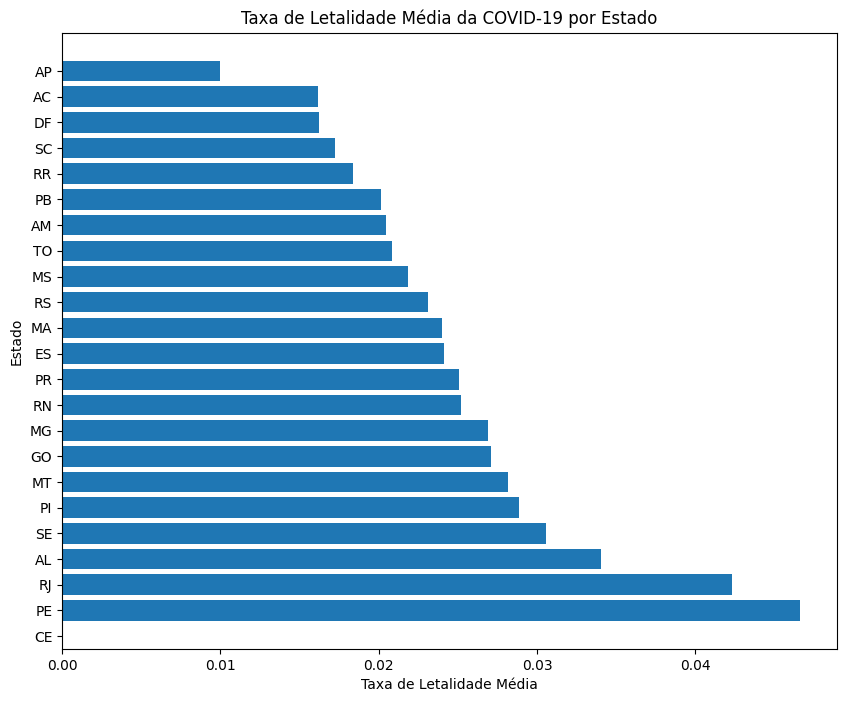

In [11]:
# Calculando a taxa de letalidade por estado ou cidade
df['letalidade'] = df['last_available_deaths'] / df['last_available_confirmed']

# Agrupando por estado para obter a média da taxa de letalidade
letalidade_estado = df.groupby('state')['letalidade'].mean().reset_index()

# Ordenando os resultados
letalidade_estado_sorted = letalidade_estado.sort_values('letalidade', ascending=False)

# Plotando
plt.figure(figsize=(10, 8))
plt.barh(letalidade_estado_sorted['state'], letalidade_estado_sorted['letalidade'])
plt.xlabel('Taxa de Letalidade Média')
plt.ylabel('Estado')
plt.title('Taxa de Letalidade Média da COVID-19 por Estado')
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_31608\2133586273.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_estado['date'] = pd.to_datetime(dados_estado['date'])
C:\Users\gabri\AppData\Local\Temp\ipykernel_31608\2133586273.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_estado.sort_values('date', inplace=True)


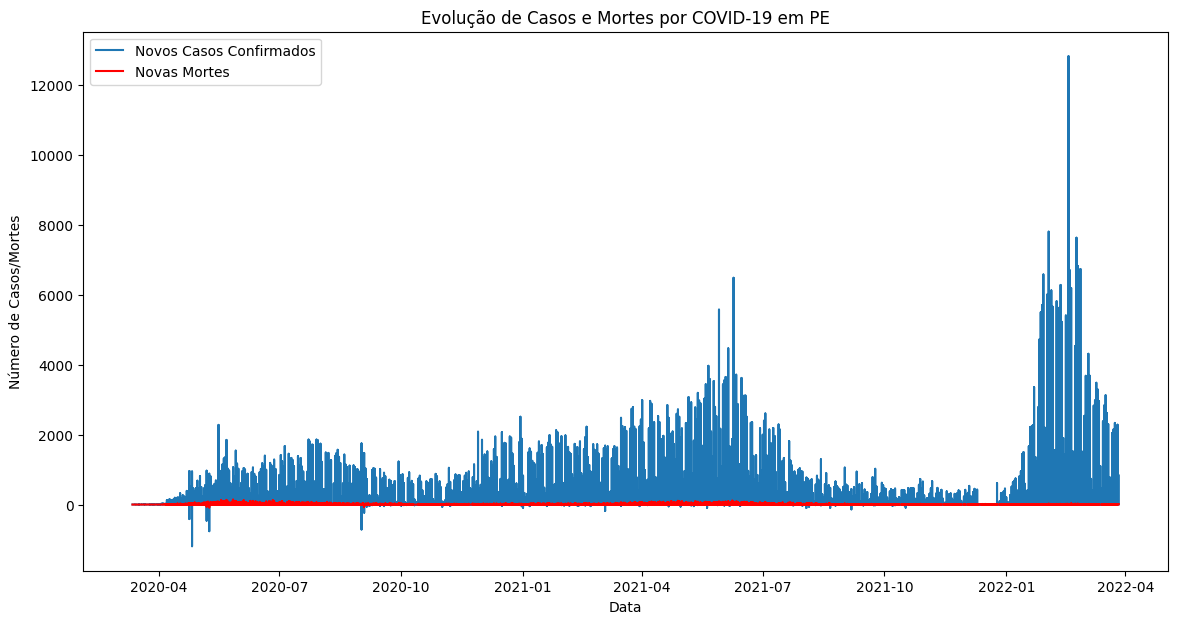

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('caso_full.csv')

# Escolha um estado ou cidade para análise
estado_especifico = 'PE'  # Substitua por seu estado ou cidade de interesse

# Filtrando os dados pelo estado ou cidade escolhido
dados_estado = df[df['state'] == estado_especifico]

# Convertendo a coluna de data e ordenando
dados_estado['date'] = pd.to_datetime(dados_estado['date'])
dados_estado.sort_values('date', inplace=True)

# Plotando novos casos confirmados e novas mortes ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(dados_estado['date'], dados_estado['new_confirmed'], label='Novos Casos Confirmados')
plt.plot(dados_estado['date'], dados_estado['new_deaths'], label='Novas Mortes', color='red')
plt.title(f'Evolução de Casos e Mortes por COVID-19 em {estado_especifico}')
plt.xlabel('Data')
plt.ylabel('Número de Casos/Mortes')
plt.legend()
plt.show()


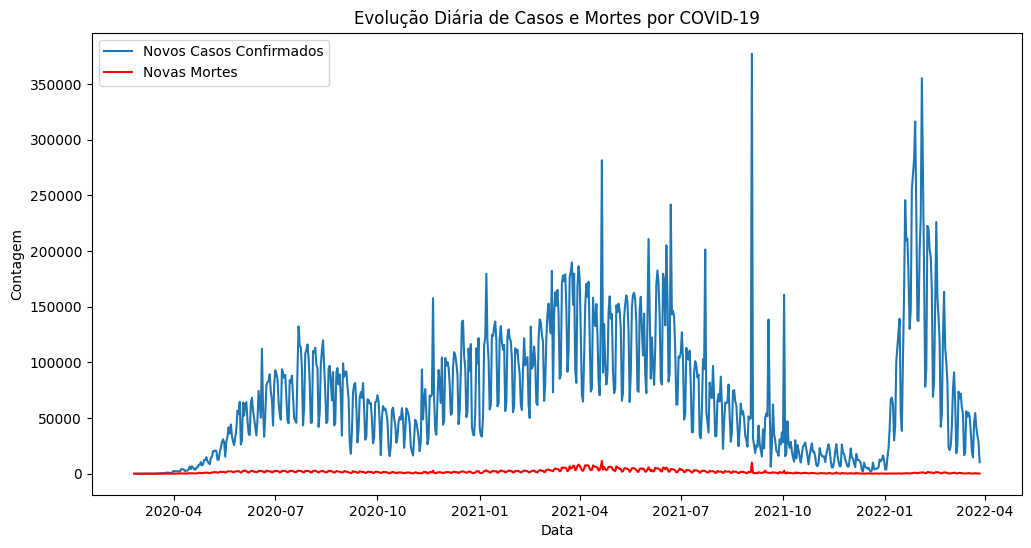

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('caso_full.csv')

# Convertendo a coluna de data para datetime
df['date'] = pd.to_datetime(df['date'])

# Agrupando dados por data e somando novos casos e mortes
daily_summary = df.groupby('date').agg({
    'new_confirmed': 'sum',
    'new_deaths': 'sum'
}).reset_index()

# Plotando a evolução de novos casos e mortes
plt.figure(figsize=(12, 6))
plt.plot(daily_summary['date'], daily_summary['new_confirmed'], label='Novos Casos Confirmados')
plt.plot(daily_summary['date'], daily_summary['new_deaths'], label='Novas Mortes', color='red')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.title('Evolução Diária de Casos e Mortes por COVID-19')
plt.legend()
plt.show()

In [ ]:
######################### GERANDO UM NOVO CSV FOCADO EM SP + CASOS NÃO REPETIDOS#####################################################

In [3]:
import pandas as pd

df = pd.read_csv('caso_full.csv') 

df_filtered = df[(df['state'] == 'SP') & (df['is_repeated'] == False)]

df_filtered.to_csv('dados_filtrados_SP.csv', index=False)

In [ ]:
######################### GRAFICOS ALEATORIOS,IDEIAS#####################################################

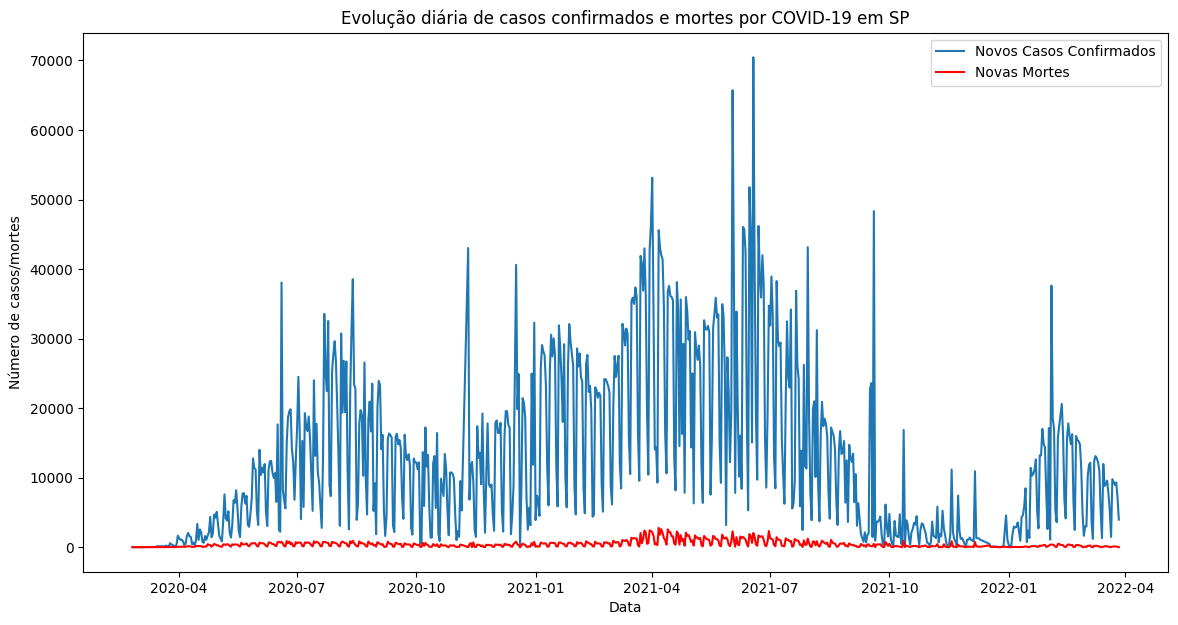

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna 'date' para datetime para facilitar a manipulação
df['date'] = pd.to_datetime(df['date'])

# Agregando os dados por data
daily_totals = df.groupby('date').agg({'new_confirmed': 'sum', 'new_deaths': 'sum'}).reset_index()

# Plotando os resultados
plt.figure(figsize=(14, 7))
plt.plot(daily_totals['date'], daily_totals['new_confirmed'], label='Novos Casos Confirmados')
plt.plot(daily_totals['date'], daily_totals['new_deaths'], color='red', label='Novas Mortes')
plt.title('Evolução diária de casos confirmados e mortes por COVID-19 em SP')
plt.xlabel('Data')
plt.ylabel('Número de casos/mortes')
plt.legend()
plt.show()

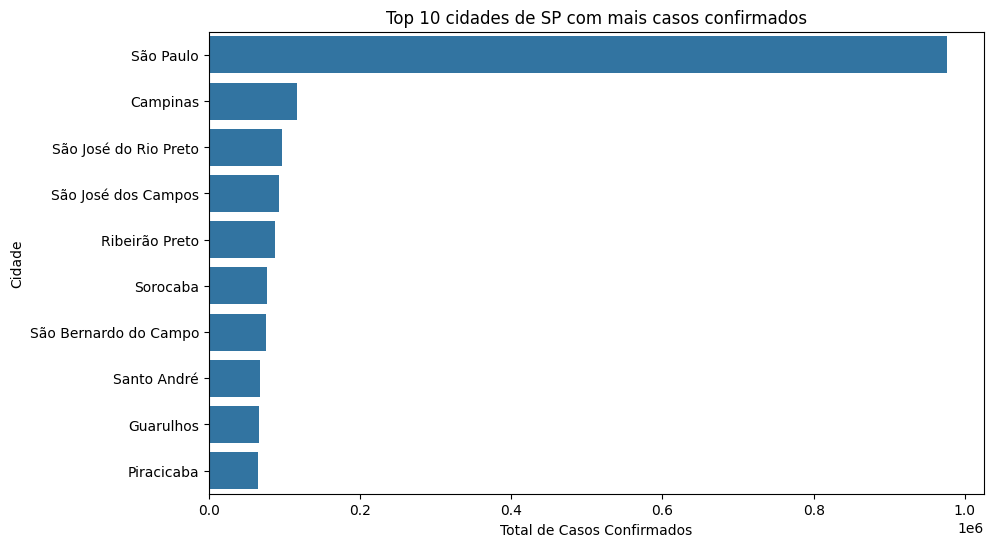

In [10]:
city_totals = df.groupby('city').agg({'last_available_confirmed': 'max', 'last_available_deaths': 'max'}).reset_index()

# Plotando os 10 municípios com mais casos confirmados
plt.figure(figsize=(10, 6))
top_cities = city_totals.sort_values(by='last_available_confirmed', ascending=False).head(10)
sns.barplot(x='last_available_confirmed', y='city', data=top_cities)
plt.title('Top 10 cidades de SP com mais casos confirmados')
plt.xlabel('Total de Casos Confirmados')
plt.ylabel('Cidade')
plt.show()


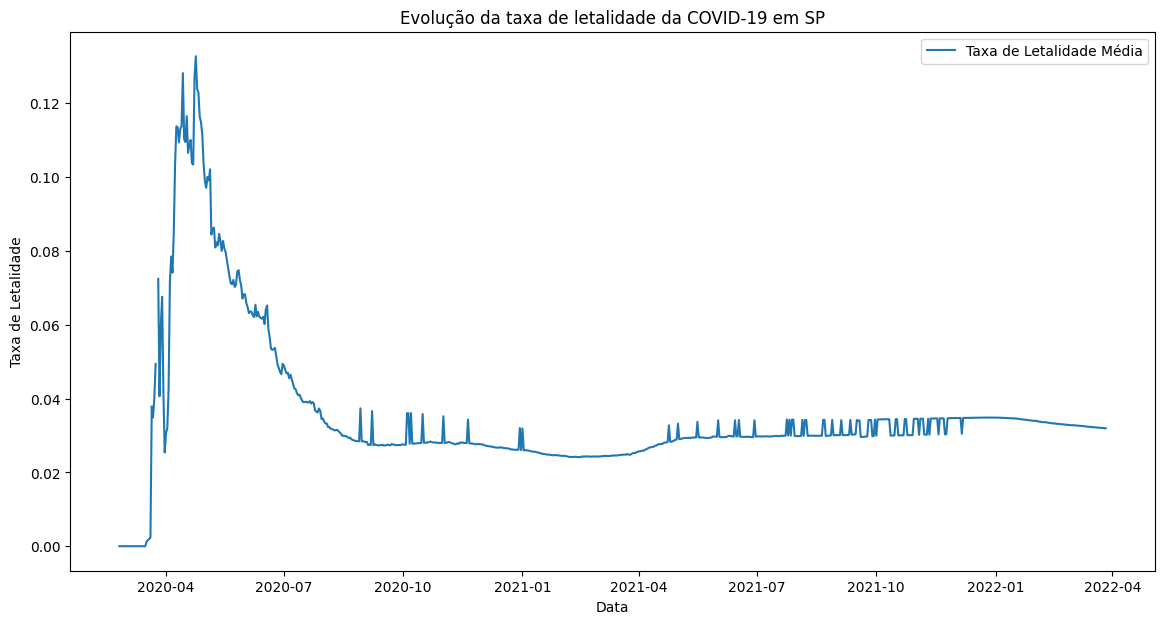

In [11]:
df['death_rate'] = df['last_available_deaths'] / df['last_available_confirmed']
average_death_rate = df.groupby('date')['death_rate'].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(average_death_rate['date'], average_death_rate['death_rate'], label='Taxa de Letalidade Média')
plt.title('Evolução da taxa de letalidade da COVID-19 em SP')
plt.xlabel('Data')
plt.ylabel('Taxa de Letalidade')
plt.legend()
plt.show()
